In [1]:
from gensim.models import Word2Vec

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

import ast

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# read data
df = pd.read_csv('../data/twitter/processed.csv', encoding='latin-1')
df['processed_text'] = df['processed_text'].apply(lambda x: ast.literal_eval(x))

In [3]:
df.head()

,target,text,processed_text
0,0,"still sitting under the dryer, my neck hurts","[still, sitting, under, the, dryer, my, neck, ..."
1,1,@sarahshah this is my nightmare (even tho i on...,"[sarahshah, this, is, my, nightmare, even, tho..."
2,0,"@mjvarela black is good... tight, or should I ...","[mjvarela, black, is, good, tight, or, should,..."
3,0,Takes forever for everybody to get ready.,"[take, forever, for, everybody, to, get, ready]"
4,0,@Bklyncookie omg all the LA bad weather aura i...,"[bklyncookie, omg, all, the, la, bad, weather,..."


In [4]:
# download word2vec model: use best-performing one based on qualitative evaluation
w2v_model = Word2Vec.load('./models/word2vec/skipgram_300_5_15.model')

In [5]:
# use word2vec to vectorize each token, and create sentence embeddings by averaging word vectors of one sentence
def get_sentence_embedding(tokens):
    vectors = []
    for token in tokens:
        if token in w2v_model.wv:
            vectors.append(w2v_model.wv[token])
    return np.mean(vectors, axis=0)

df['sentence_embeddings'] = df['processed_text'].apply(get_sentence_embedding)

In [6]:
df.head()

,target,text,processed_text,sentence_embeddings
0,0,"still sitting under the dryer, my neck hurts","[still, sitting, under, the, dryer, my, neck, ...","[0.048295412, 0.15488097, -0.1450944, 0.028779..."
1,1,@sarahshah this is my nightmare (even tho i on...,"[sarahshah, this, is, my, nightmare, even, tho...","[0.0427347, 0.12151257, 0.012503947, 0.0669634..."
2,0,"@mjvarela black is good... tight, or should I ...","[mjvarela, black, is, good, tight, or, should,...","[0.039398003, 0.21469317, -0.049915295, 0.0665..."
3,0,Takes forever for everybody to get ready.,"[take, forever, for, everybody, to, get, ready]","[-0.026337782, 0.21350943, 0.005566063, 0.0691..."
4,0,@Bklyncookie omg all the LA bad weather aura i...,"[bklyncookie, omg, all, the, la, bad, weather,...","[0.036916517, 0.15111856, -0.061840866, 0.0352..."


In [7]:
# split data into train and test
X = np.vstack(df['sentence_embeddings'].values)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    stratify=df['target'],
    test_size=0.2
)


### Random Forest Classifier

In [8]:
clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
def evaluate_model(y_test, y_pred):
    # Accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Classification report (precision, recall, f1)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.7025
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1000
           1       0.70      0.70      0.70      1000

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



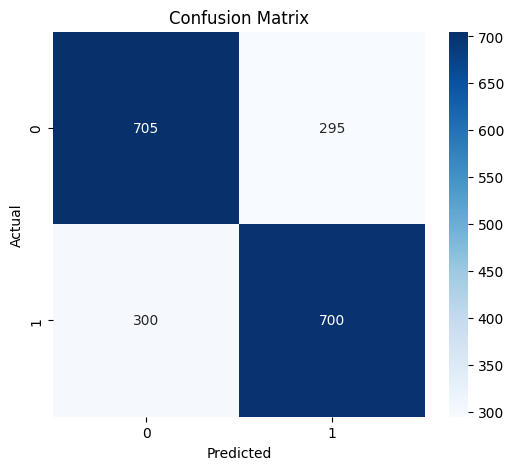

In [10]:
# evaluate on test set
y_pred = clf.predict(X_test)

evaluate_model(y_test, y_pred)

### Logistic Regression

In [11]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Accuracy: 0.715
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1000
           1       0.71      0.74      0.72      1000

    accuracy                           0.71      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.72      0.71      0.71      2000



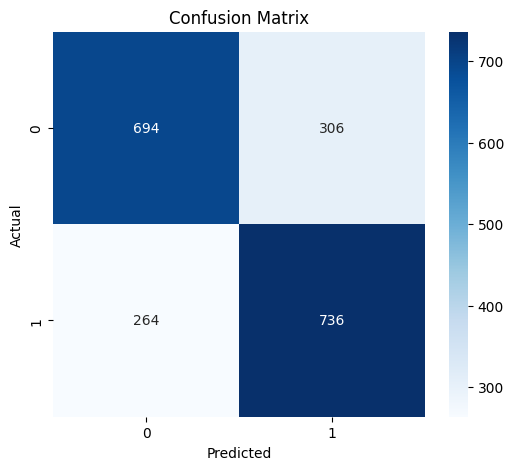

In [12]:
# evaluate on test set
y_pred = clf.predict(X_test)

evaluate_model(y_test, y_pred)

Logistic Regression performs slightly better on the word2vec embeddings compared to Random Forest